# Maximization of banana function by various methods

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demopt04.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>


$$f(x,y)=-100*(y-x^2)^2-(1-x)^2$$
starting at \[0,1\].


In [1]:
import numpy as np
from compecon import OP
np.set_printoptions(4, linewidth=120, suppress=True)
import matplotlib.pyplot as plt

from compecon.demos import demo

In [2]:
''' Set up the problem '''
x0 = [1, 0]
banana = OP(lambda x: -100 * (x[1] - x[0] ** 2)**2 - (1 - x[0]) ** 2,
            x0, maxit=250, print=True, all_x=True)

In [3]:
x = banana.qnewton()
J = banana.jacobian(x)
E = np.linalg.eig(banana.hessian(x))[0]
print('x = ', x, '\nJ = ', J, '\nE = ', E)

   0     0  6.56e-01
   1     0  1.22e-01
   2     0  1.43e-02
   3     0  4.66e-03
   4     0  1.18e-01
   5     0  2.03e-02
   6     0  4.83e-02
   7     0  2.29e-01
   8     0  5.16e-02
   9     0  7.99e-02
  10     0  6.84e-02
  11     0  1.82e-01
  12     0  4.10e-02
  13     0  6.38e-02
  14     0  2.03e-01
  15     0  7.79e-02
  16     0  5.22e-02
  17     0  1.48e-01
  18     0  6.66e-02
  19     0  2.97e-02
  20     0  6.03e-02
  21     0  1.81e-03
  22     0  9.11e-03
  23     0  1.73e-03
  24     0  9.07e-05
  25     0  7.26e-07
  26     0  1.01e-09
x =  [1. 1.] 
J =  [-0.  0.] 
E =  [-1001.6006    -0.3994]


In [4]:
''' Plots options '''
steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 1.0,
                 'markersize': 3,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': -np.exp(np.arange(7,0.25,-0.5)),
                   'colors': '0.25',
                   'linewidths': 0.5}



Maximization with method STEEPEST
   0     0  6.56e-01
   1     0  1.01e-01
   2     0  8.28e-03
   3     0  2.87e-02
   4     0  7.67e-03
   5     0  2.73e-02
   6     0  7.05e-03
   7     0  2.56e-02
   8     0  6.49e-03
   9     0  2.38e-02
  10     0  5.98e-03
  11     0  2.22e-02
  12     0  5.54e-03
  13     0  2.07e-02
  14     0  5.14e-03
  15     0  1.94e-02
  16     0  4.80e-03
  17     0  1.81e-02
  18     0  4.49e-03
  19     0  1.70e-02
  20     0  4.22e-03
  21     0  1.60e-02
  22     0  3.98e-03
  23     0  1.51e-02
  24     0  3.76e-03
  25     0  1.43e-02
  26     0  3.57e-03
  27     0  1.36e-02
  28     0  3.39e-03
  29     0  1.29e-02
  30     0  3.23e-03
  31     0  1.23e-02
  32     0  3.08e-03
  33     0  1.17e-02
  34     0  2.95e-03
  35     0  1.12e-02
  36     0  2.82e-03
  37     0  1.07e-02
  38     0  2.71e-03
  39     0  1.03e-02
  40     0  2.60e-03
  41     0  9.86e-03
  42     0  2.50e-03
  43     0  9.48e-03
  44     0  2.41e-03
  45     0  9.12e-0

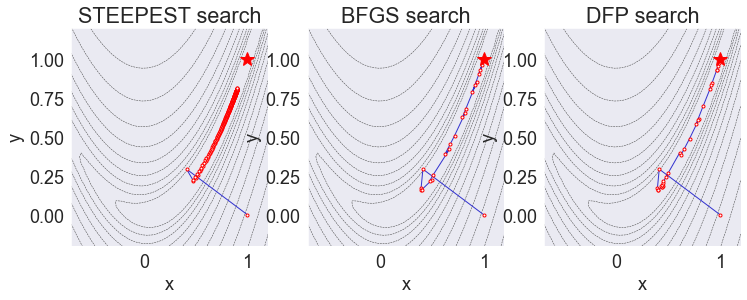

In [5]:
''' Data for coutours '''
n = 40  # number of grid points for plot per dimension
xmin = [-0.7, -0.2]
xmax = [ 1.2,  1.2]

X0, X1 = np.meshgrid(*[np.linspace(a, b, n) for a, b in zip(xmin, xmax)])
Y = banana.f([X0.flatten(), X1.flatten()])
Y.shape = (n, n)

fig = plt.figure(figsize=[12,4])

for it, method in enumerate(banana.search_methods.keys()):
    ''' Solve problem with given method '''
    print('\n\nMaximization with method ' + method.upper())
    x = banana.qnewton(SearchMeth=method)
    print('x =', x)

    ''' Plot the result '''
    demo.subplot(1, 3, it + 1, method.upper(),'x','y')
    
    plt.contour(X0, X1, Y, **contour_options)
    plt.plot(*banana.x_sequence, **steps_options)
    plt.plot(1, 1, 'r*', markersize=15)
    plt.title(method.upper() + " search")
    plt.xlabel('x', verticalalignment='top')
    plt.ylabel('y', verticalalignment= 'bottom')
    plt.axis((xmin[0], xmax[0], xmin[1], xmax[1]))
    
plt.show()

## Using Scipy

As of this version of CompEcon, the Nelder Mead method has not been implemented. However, we can still use it with the help of the **scipy.optimize.minimize** function. To this end, we must rewrite the banana function (change its sign) so that we switch from our original maximization problem to one of minimization.




In [6]:
from scipy.optimize import minimize

In [7]:
x0 = [1, 0]
def banana2(x):
    return 100 * (x[1] - x[0] ** 2)**2 + (1 - x[0]) ** 2

In [8]:
res = minimize(banana2, x0, method='Nelder-Mead')
print(res)

 final_simplex: (array([[1.    , 1.0001],
       [1.    , 1.    ],
       [1.    , 1.    ]]), array([0., 0., 0.]))
           fun: 1.0078716929461423e-09
       message: 'Optimization terminated successfully.'
          nfev: 148
           nit: 79
        status: 0
       success: True
             x: array([1.    , 1.0001])
